In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
#generation of starting inventory
#inventory consists of [gold,water,fire,air,earth,empty]
plecak = [10,0,0,0,0,0]
def buy(plecak):
    while plecak[0]>1:
        i = np.random.randint(1,6)
        if(i<5):
            plecak[i] = plecak[i]+1
            plecak[0] = plecak[0]-2
        else:
            plecak[i] = plecak[i]+1
            plecak[0] = plecak[0]-1
    if(plecak[0]==1):
        plecak[5] = plecak[5]+1
        plecak[0] = plecak[0]-1
    return(plecak)
print(plecak)

[10, 0, 0, 0, 0, 0]


In [13]:
#fill crystals
def fill(plecak):
    n=5
    while n not in (0,1,2,3):
        n=np.random.normal(4,2)//2
    i = np.random.randint(1,5)
    while n != 0 and plecak[5]>0:
        plecak[i] = plecak[i]+1
        plecak[5] = plecak[5]-1
        n=n-1
    return(plecak)
print(plecak)

[10, 0, 0, 0, 0, 0]


In [14]:
#sell crystals
def sell(plecak):
    s = sum(plecak[1:5])
    plecak = [plecak[0]+s//3*10,0,0,0,0,plecak[5]]
    return(plecak)
plecak = sell(plecak)
print(plecak)

[10, 0, 0, 0, 0, 0]


In [15]:
#buy a card
def buy_card(plecak):
    n=0
    while n not in (3,4,5,6,7,8):
        n=np.random.normal(12,4)//2
    return(n)

153.3512443016217 126.41958520880378
52.36302304267883


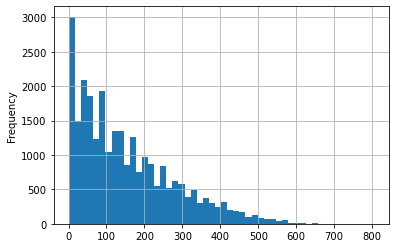

In [21]:
start = time.time()
op = []
for a in range(0,100000):
    plecak = [10,0,0,0,0,0]
    z = 0
    while z<10:
        n=0
        plecak = buy(plecak)
        plecak = fill(plecak)
        plecak = sell(plecak)
        while n not in (3,4,5,6,7,8):
            n=np.random.normal(12,4)//2
        plecak[0] = plecak[0] - n    
        z = z + 1
    op.append(plecak[0])
# print(op)
output = pd.Series(op)
#remove output = 0 dummy runs
output[output>0].plot.hist(grid=True, bins=50)
print(output[output>0].mean(),output[output>0].std())
end = time.time()
print(end - start)